# Customer Churn Prediction


## Introduction
Completed as part of the IBM Professional Certificate in Data Science. 


## Business Question 
What factors predict a churn, i.e., loss of a customer? 


## Methodology

### Data Collection
Inputs: Customer data (demographics, types of services, account data) labeled with churn status

    using data from Kaggle : [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)
    
Outputs: prediction of customer churn

### Model Selection
Prediction will use a decision tree (machine learning) method because it is the most easy to understand what factors are predictive from these models. 



In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [4]:
# read in data from a downloaded csv

df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
column_list = list(df.columns.values)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# convert data type for TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
for series in column_list : 
    print(series, df[series].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [10]:
# make a list of columns to exclude non-categorical data from certain analyses/manipulations
exclude_list = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
# combining "No -type- service" with "No" for easier analysis

df.replace({"No phone service" : "No" , "No internet service" : "No"}, inplace=True)

In [12]:
for series in column_list :
    if series not in exclude_list :
        print(series, "\n", df[series].value_counts(), "\n")
        

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No     4072
Yes    2971
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No     4614
Yes    2429
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No     4621
Yes    2422
Name: DeviceProtection, dtype: int64 

TechSupport 
 No     4999
Yes    2044
Name: TechSupport, dtype: int64 

StreamingTV 
 No     4336
Yes    2707
Name: StreamingTV, dtype: int64 

StreamingMovies 
 No     4311
Yes    2732
Name: StreamingMovies, dtype: int64 

Co

### Data Manipulation

- remove any rows with missing churn data
- dimensionality reduction
    - becuase decision tree works best with fewer features
- divide data into feature matrix (all independent variables) and target vector (the dependent variable churn)
- replace text data with dummy values for sklearn
- divide data into training and test sets


Data exploration above shows:
- no missing values
- good variability in categorical data

For categorical data, a contingency table should show which features are more strongly predictive of churn. The correlation is measured using the [phi coefficient](https://en.wikipedia.org/wiki/Phi_coefficient).

In [13]:
for series in column_list :
    if series not in exclude_list :
        if len(df[series].unique()) == 2 :
            cross_table = pd.crosstab(df['Churn'], df[series], normalize=True)
            print(cross_table)
            
            n11 = (cross_table[df[series].unique()[0]]['No'])
            n10 = (cross_table[df[series].unique()[1]]['No'])
            n01 = (cross_table[df[series].unique()[0]]['Yes'])
            n00 = (cross_table[df[series].unique()[1]]['Yes'])
            
            nd1 = n11 + n01
            nd0 = n10 + n00
            n1d = n11 + n10
            n0d = n01 + n00
            
            root = n1d * n0d * nd0 *nd1
            sqroot = math.sqrt(root)
            numerator = ( n11 * n00 ) - ( n10 * n01 )
            phi = numerator / sqroot
            print(phi)

gender    Female      Male
Churn                     
No      0.361920  0.372710
Yes     0.133324  0.132046
-0.008612095078997831
SeniorCitizen         0         1
Churn                            
No             0.640068  0.094562
Yes            0.197785  0.067585
0.15088932817647305
Partner        No       Yes
Churn                      
No       0.346585  0.388045
Yes      0.170382  0.094988
0.15044754495917653
Dependents        No       Yes
Churn                         
No          0.481329  0.253301
Yes         0.219083  0.046287
-0.16422140157972528
PhoneService        No       Yes
Churn                           
No            0.072696  0.661934
Yes           0.024137  0.241232
0.01194198002900311
MultipleLines        No       Yes
Churn                            
No             0.433480  0.301150
Yes            0.144683  0.120687
0.040102127699826136
OnlineSecurity        No       Yes
Churn                             
No              0.489848  0.244782
Yes             0.22348

Sanity check shows that Churn is perfectly correlated with Churn.

No strong correlations seen from this univariate analysis. The strongest correlations are PaperlessBilling, TechSupport, OnlineSecurity, SeniorCitizen. I'll keep these as the categorical varibles to consider in the Decision Tree. I'll also keep Contract and PaymentMethod. (Since they have >2 categories, their correlation cannot be tested with the phi coefficient.)

In [14]:
cat_var_list = ['PaperlessBilling', 'TechSupport', 'OnlineSecurity', 'SeniorCitizen', 'Contract', 'PaymentMethod']

A histogram with the remaining continuous variables will show if there is some clear separation of with respect to churn. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A113FEAA90>,
      dtype=object)

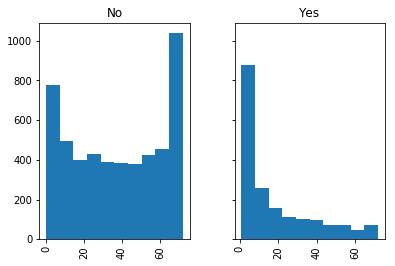

In [15]:
df['tenure'].hist(by=df['Churn'], sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1142BE978>,
      dtype=object)

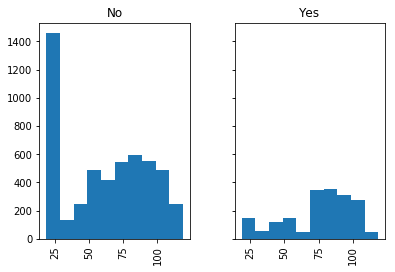

In [16]:
df['MonthlyCharges'].hist(by=df['Churn'], sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A113E68F28>,
      dtype=object)

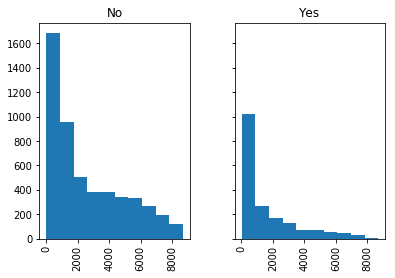

In [17]:
df['TotalCharges'].hist(by=df['Churn'], sharey=True)

It looks like there is higher probability of churn within first few months of tenure, less churn with lower MonthlyCharges, and less churn with lower TotalCharges. I will keep tenure and MonthlyCharges for the Decision Tree. 

In [18]:
cont_var_list = ['tenure', 'MonthlyCharges']

### Modeling

In [19]:
final_var_list = cat_var_list + cont_var_list
print(final_var_list)

['PaperlessBilling', 'TechSupport', 'OnlineSecurity', 'SeniorCitizen', 'Contract', 'PaymentMethod', 'tenure', 'MonthlyCharges']


In [20]:
X = df[final_var_list].values

In [21]:
X

array([['Yes', 'No', 'No', ..., 'Electronic check', 1, 29.85],
       ['No', 'No', 'Yes', ..., 'Mailed check', 34, 56.95],
       ['Yes', 'No', 'Yes', ..., 'Mailed check', 2, 53.85],
       ...,
       ['Yes', 'No', 'Yes', ..., 'Electronic check', 11, 29.6],
       ['Yes', 'No', 'No', ..., 'Mailed check', 4, 74.4],
       ['Yes', 'Yes', 'Yes', ..., 'Bank transfer (automatic)', 66,
        105.65]], dtype=object)

In [22]:
y = df['Churn']

SKLearn Decision Tree cannot accept categorical values in string format, so they are converted to dummy variables. 

In [23]:
le_PaperlessBilling = preprocessing.LabelEncoder()
le_PaperlessBilling.fit(['No', 'Yes'])
X[:,0] = le_PaperlessBilling.transform(X[:,0]) 

In [24]:
le_TechSupport = preprocessing.LabelEncoder()
le_TechSupport.fit(['No', 'Yes'])
X[:,1] = le_TechSupport.transform(X[:,1]) 

In [25]:
le_OnlineSecurity = preprocessing.LabelEncoder()
le_OnlineSecurity.fit(['No', 'Yes'])
X[:,2] = le_OnlineSecurity.transform(X[:,2]) 

In [26]:
le_Contract = preprocessing.LabelEncoder()
le_Contract.fit(['Month-to-month', 'One year', 'Two year'])
X[:,4] = le_Contract.transform(X[:,4])

In [27]:
le_PaymentMethod = preprocessing.LabelEncoder()
le_PaymentMethod.fit(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
X[:,5] = le_PaymentMethod.transform(X[:,5])

In [28]:
X

array([[1, 0, 0, ..., 2, 1, 29.85],
       [0, 0, 1, ..., 3, 34, 56.95],
       [1, 0, 1, ..., 3, 2, 53.85],
       ...,
       [1, 0, 1, ..., 2, 11, 29.6],
       [1, 0, 0, ..., 3, 4, 74.4],
       [1, 1, 1, ..., 0, 66, 105.65]], dtype=object)

In [29]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

In [30]:
churnTree2 = DecisionTreeClassifier(criterion = "entropy" , max_depth = 2)
churnTree2.fit(X_trainset, y_trainset)
predTree2 = churnTree2.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree2))

DecisionTrees's Accuracy:  0.730305180979418


In [31]:
churnTree3 = DecisionTreeClassifier(criterion = "entropy" , max_depth = 3)
churnTree3.fit(X_trainset, y_trainset)
predTree3 = churnTree3.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree3))

DecisionTrees's Accuracy:  0.7785663591199432


In [32]:
churnTree4 = DecisionTreeClassifier(criterion = "entropy" , max_depth = 4)
churnTree4.fit(X_trainset, y_trainset)
predTree4 = churnTree4.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree4))

DecisionTrees's Accuracy:  0.7842441447835344


In [33]:
churnTree5 = DecisionTreeClassifier(criterion = "entropy" , max_depth = 5)
churnTree5.fit(X_trainset, y_trainset)
predTree5 = churnTree5.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree5))

DecisionTrees's Accuracy:  0.7700496806245565


The accuracy versus tree depth was tested. 

|  Depth  |  Accuracy  |
|---------|------------|
|    2    |   0.73     |
|    3    |   0.78     |
|    4    |   0.78     |
|    5    |   0.77     |

Depth of 3 and 4 have highest accuracy to two decimal places. I will plot both of them to see if a depth of 4 adds any explanatory power. 

In [34]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg


In [35]:
from IPython.display import Image

In [36]:
from sklearn import tree

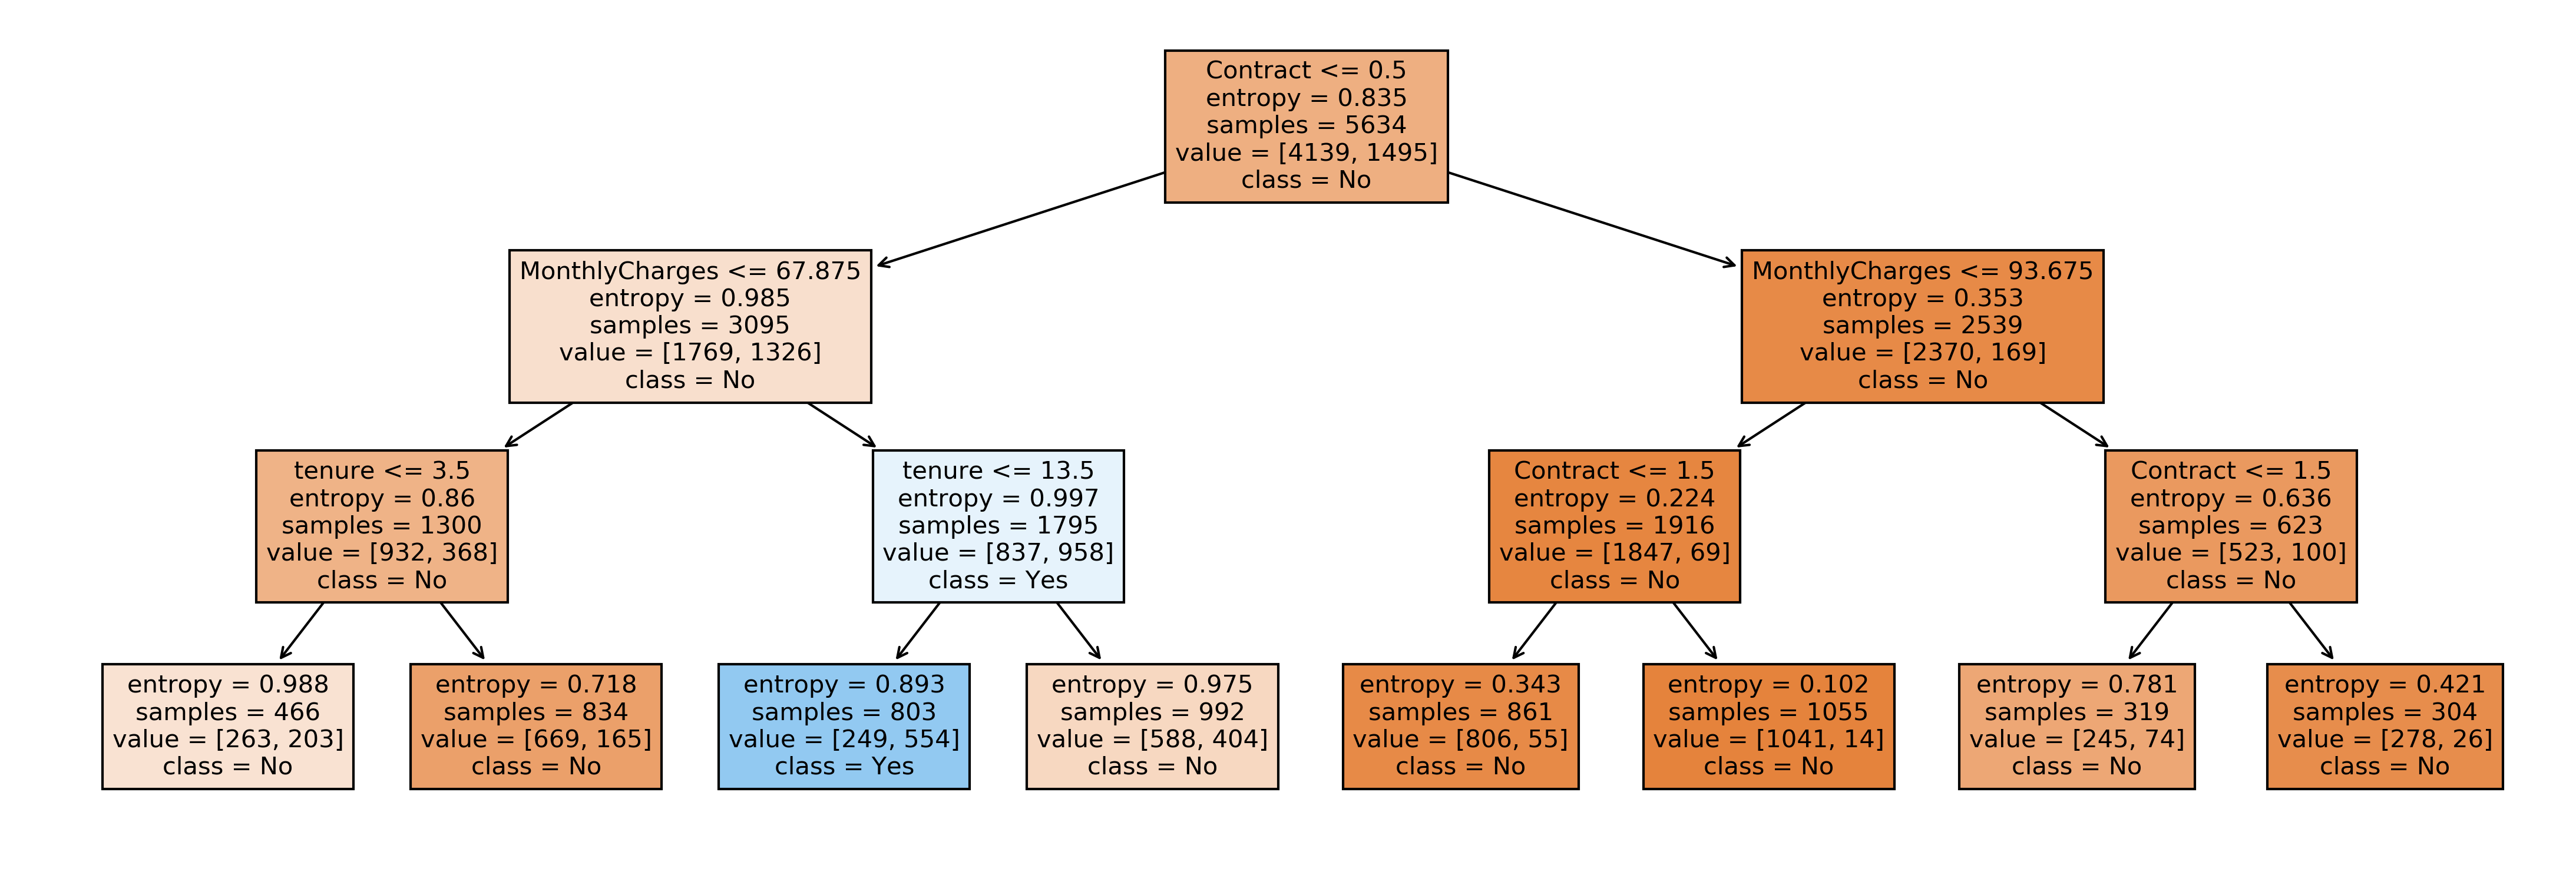

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,6), dpi=300)

tree_graphic = tree.plot_tree(churnTree3,
           feature_names = final_var_list, 
           class_names = df["Churn"].unique().tolist(),
           filled = True,
            ax=axes, fontsize=10);

plt.savefig("./images/tree3.png")

plt.show()

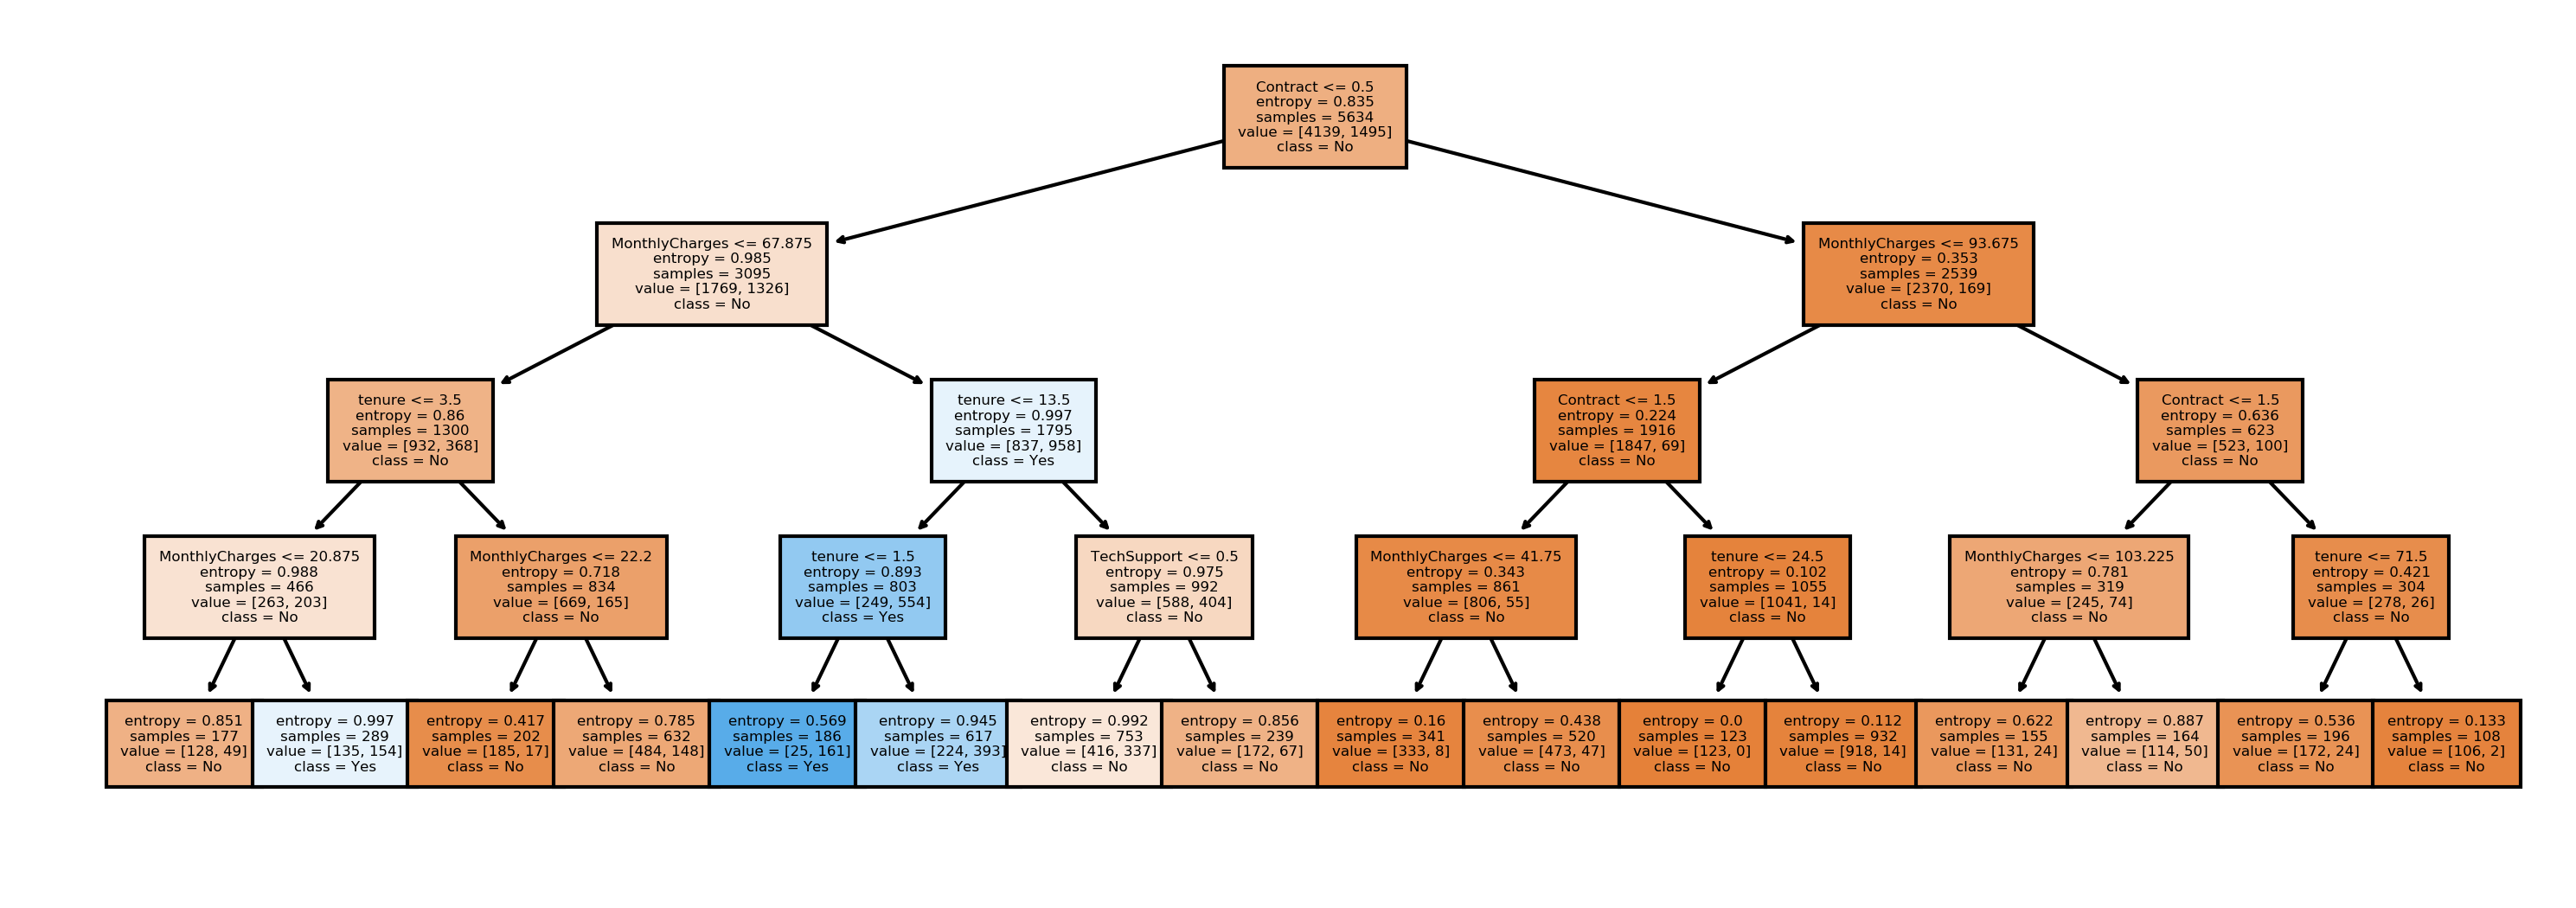

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4), dpi=300)

tree_graphic = tree.plot_tree(churnTree4,
           feature_names = final_var_list, 
           class_names = df["Churn"].unique().tolist(),
           filled = True,
            ax=axes, fontsize=4);

plt.savefig("./images/tree4.png")

plt.show()

## Results

Both decision trees identify Contract, MonthlyCharges, and tenure as the main decision points for splitting the data. The initial right branch (Contract >= 0.5) does not seem to add any explanatory power. The 4th level of depth adds a small amount of accuracy (in the third decimal place) but evaluates MonthlyCharges twice, with a very fine difference (between \\$20.875 and \\$22.20). For this reason, the tree with a depth of 3 provides the best balance between accuracy and simplicity of the model. 

Since there are only three important features, we can plot the data to better visualize the factors that lead to churn (using a random selection of 10\% of the data). 

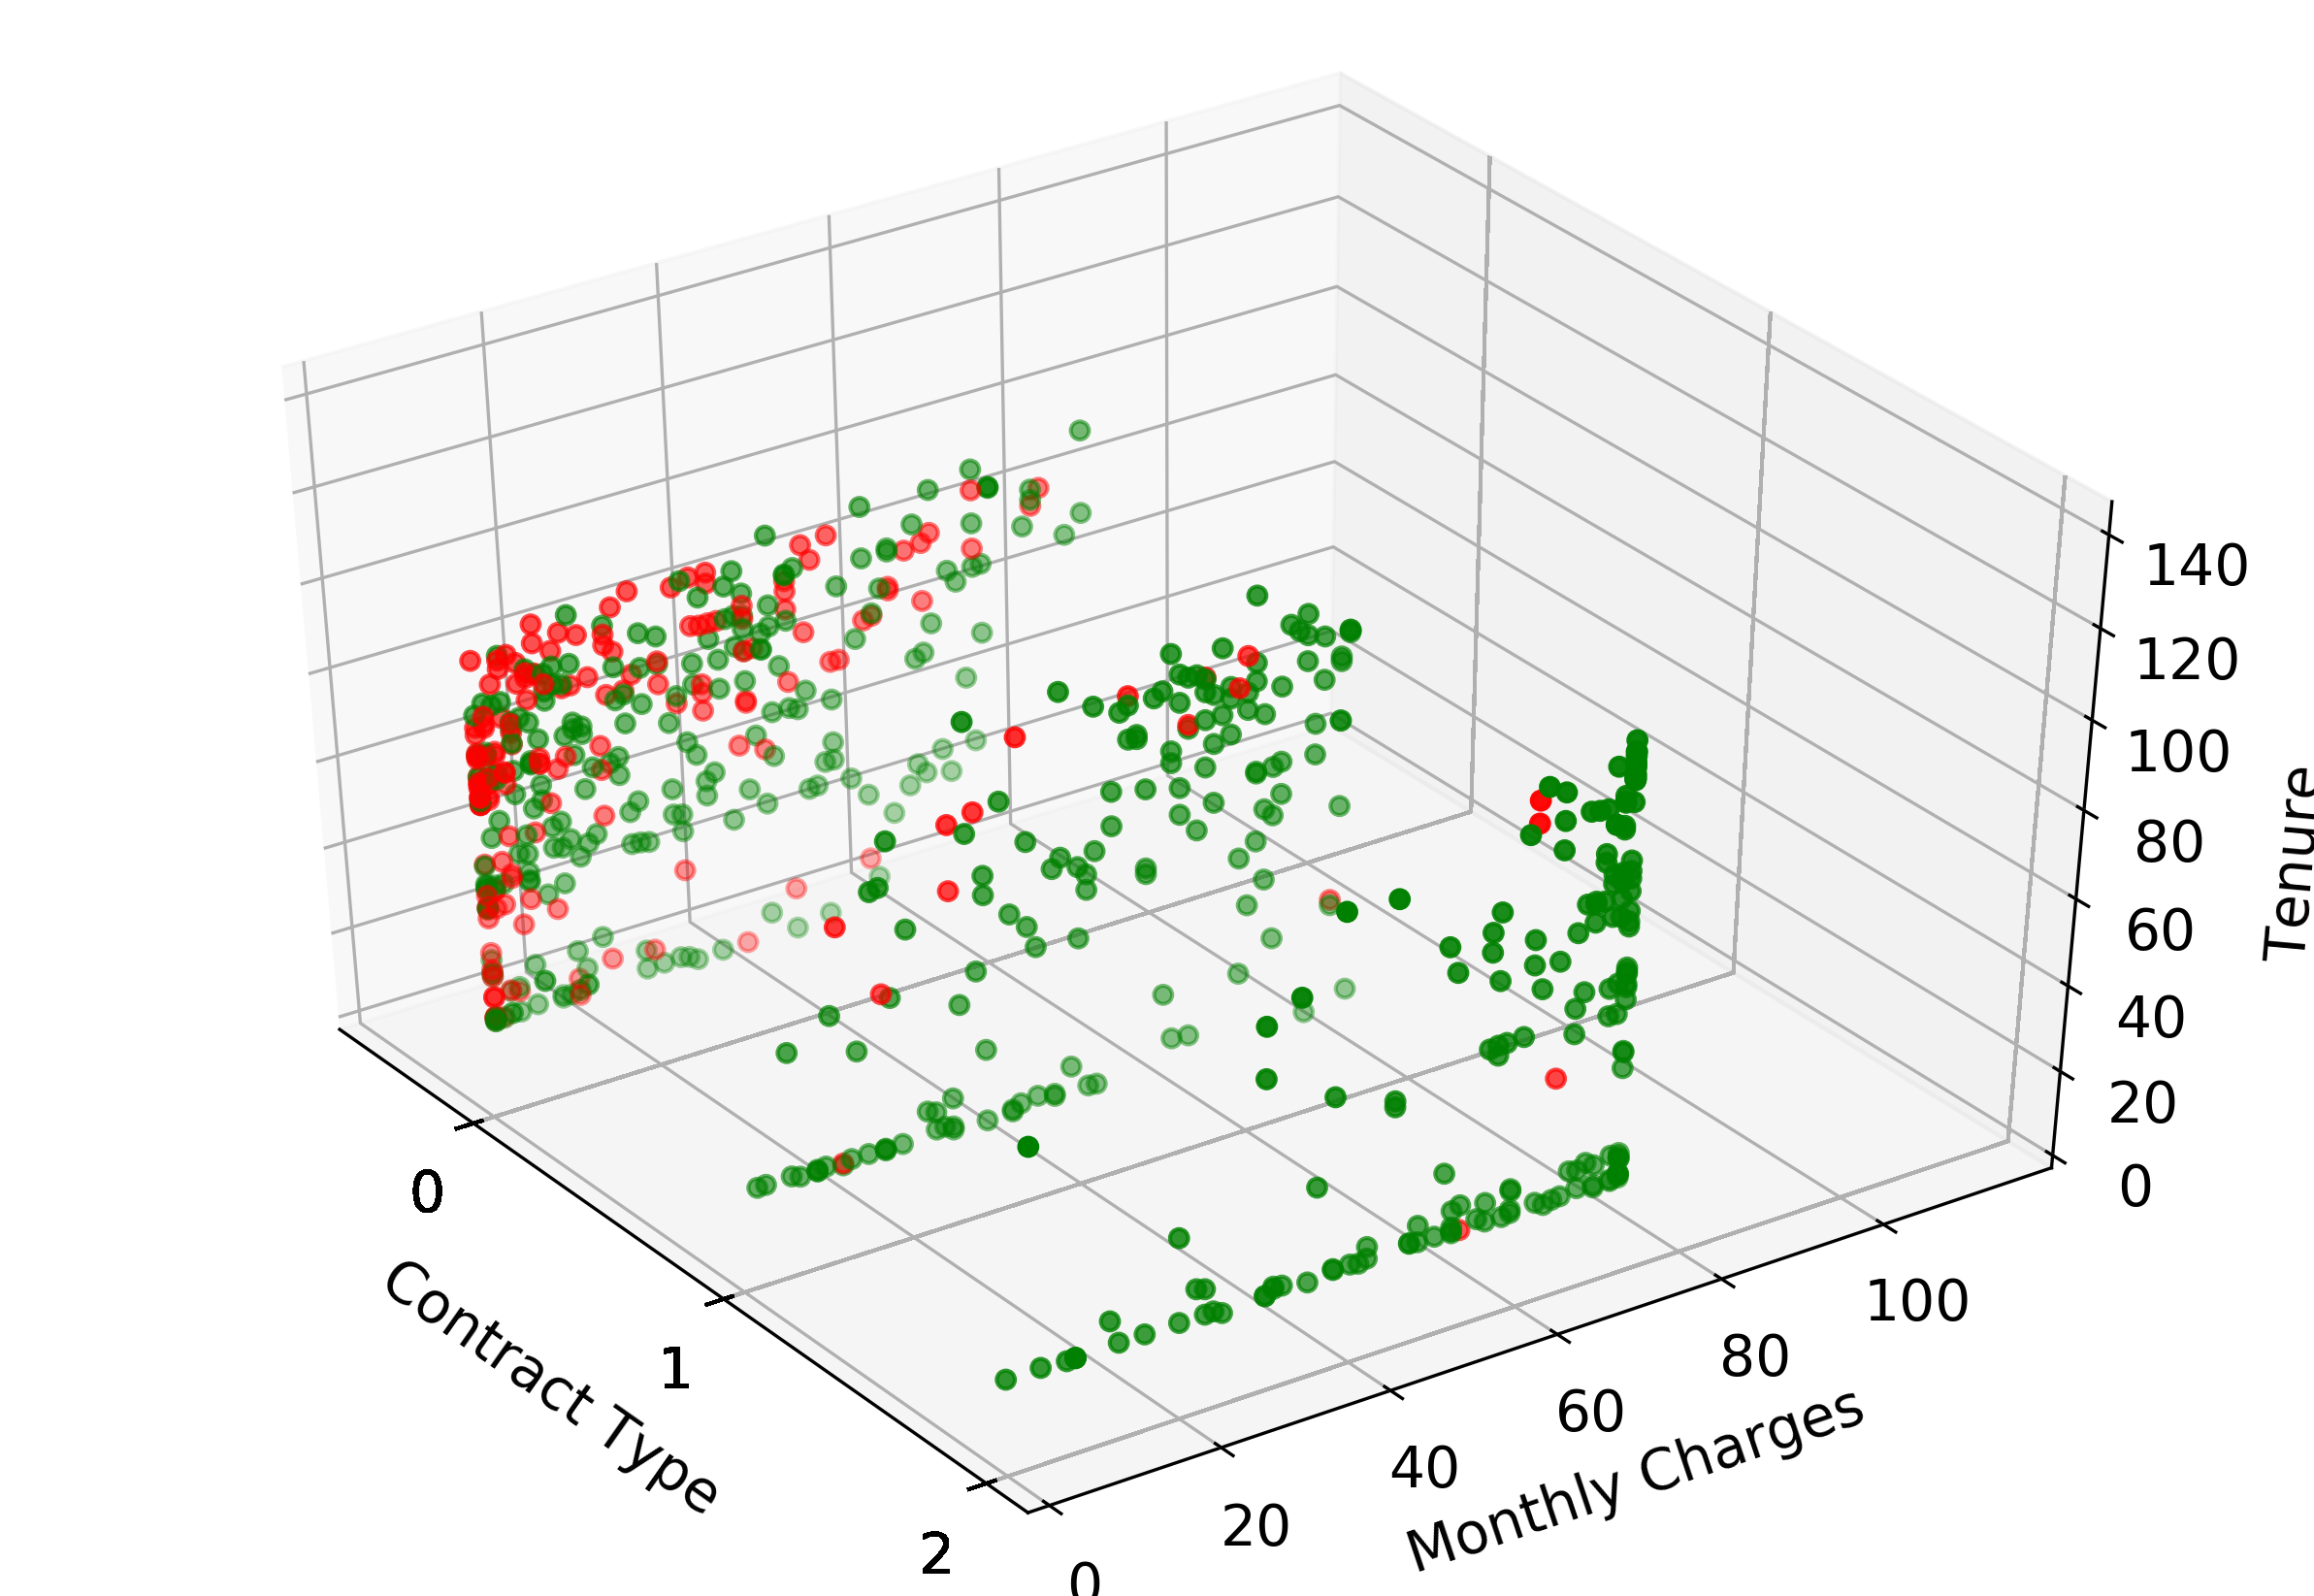

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,7), dpi=300)
ax = fig.gca(projection='3d')

df_plotting = df.sample(frac=0.1)

x = df_plotting['Contract']
#print(x)
le_Contract = preprocessing.LabelEncoder()
le_Contract.fit(['Month-to-month', 'One year', 'Two year'])
x = le_Contract.transform(x)
#print(x)

y = df_plotting['MonthlyCharges'].to_numpy()
#print(y, type(y), type(y[0]))
z = df_plotting['tenure']

c = df_plotting['Churn']
color_coding = []
for item in c :
    if item == "Yes" :
        color_coding.append('red')
    elif item == "No" :
        color_coding.append('green')

ax.set_xticks(x)
ax.set_xlim(-0.5, 2.1)
ax.set_ylim(0, y.max())
ax.set_zlim(z.min(), 2.0*z.max())

ax.set_xlabel('\nContract Type')
ax.set_ylabel('\nMonthly Charges')
ax.set_zlabel('\nTenure')

ax.view_init(elev=40, azim=-35)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.zaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    item.set_fontsize(14)

ax.scatter(x, y, z, zdir='y', c=color_coding)

plt.savefig("./images/3Dscatter.png")

plt.show()

|  -   |  Contract Types  |
|-----|------------------|
|  0  |  Month-to-Month  |
|  1  |  One Year        |
|  2  |  Two Year        |

The points are color-coded such that the red represents a customer that left and green represents a customer that stayed. 

There is cluster of customers leaving when they have a month-to-month contract, longer tenure, and low monthly charges. Conversely, there is strong loyalty when customers have two-year contracts and high monthly charges. This is consistent with the decision trees above. 

The 3D plot is difficult to interpret. A series of 2D plots may be easier to understand. 

In [40]:
c0 = df_plotting.query('Contract == "Month-to-month"')
c1 = df_plotting.query('Contract == "One year"')
c2 = df_plotting.query('Contract == "Two year"')

c0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
473,4104-PVRPS,Male,0,Yes,No,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,53.60,1315.35,No
959,5651-YLPRD,Female,0,Yes,Yes,32,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.10,2723.75,No
2624,0820-FNRNX,Male,0,Yes,Yes,17,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No
5385,0843-WTBXE,Male,0,No,No,53,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),85.45,4517.25,Yes
983,8603-IJWDN,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.60,86.60,Yes


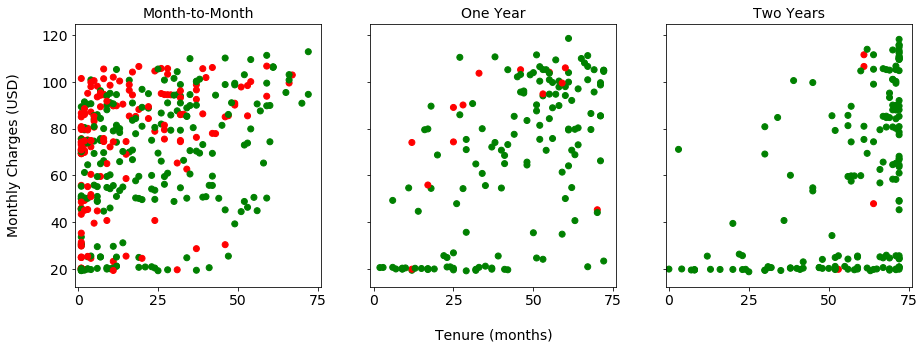

In [42]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(15)

x_c0 = c0['tenure']
x_c1 = c1['tenure']
x_c2 = c2['tenure']

y_c0 = c0['MonthlyCharges']
y_c1 = c1['MonthlyCharges']
y_c2 = c2['MonthlyCharges']

c_c0 = c0['Churn']
color_coding0 = []
for item in c_c0 :
    if item == "Yes" :
        color_coding0.append('red')
    elif item == "No" :
        color_coding0.append('green')

c_c1 = c1['Churn']
color_coding1 = []
for item in c_c1 :
    if item == "Yes" :
        color_coding1.append('red')
    elif item == "No" :
        color_coding1.append('green')
        
c_c2 = c2['Churn']
color_coding2 = []
for item in c_c2 :
    if item == "Yes" :
        color_coding2.append('red')
    elif item == "No" :
        color_coding2.append('green')

ax0.set_title("Month-to-Month")
ax1.set_title("One Year")
ax2.set_title("Two Years")

ax0.set_ylabel("Monthly Charges (USD)\n")
ax1.set_xlabel("\nTenure (months)")

ax0.set_xlim(-1,76)
ax1.set_xlim(-1,76)
ax2.set_xlim(-1,76)

ax0.set_xticks([0,25,50,75])
ax1.set_xticks([0,25,50,75])
ax2.set_xticks([0,25,50,75])

for item in ([ax0.title, ax1.title, ax2.title, ax1.xaxis.label, ax0.yaxis.label] +
             ax0.get_xticklabels() + ax0.get_yticklabels() + 
             ax1.get_xticklabels() + ax1.get_yticklabels() + 
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)


ax0.scatter(x_c0, y_c0, c=color_coding0)
ax1.scatter(x_c1, y_c1, c=color_coding1)
ax2.scatter(x_c2, y_c2, c=color_coding2)

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("./images/2Dscatter.png")

plt.show()

## Discussion

This work starts with a large number of features - 19 in total. The correlation of each feature with churn was investigated individually to determine whether the feature should be retained for decision tree modeling. Most features had only a weak univariate correlation to churn. Eight features were retained for the decision tree, of which only 3 were found to be predictive. The decision tree was built with the default algorithm [CART](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart) of SKLearn, which continues to divide data up to the maximum tree depth specified. In this case, some branches do not add explanatory power; for example, the right branch after the root node all have terminal nodes showing no churn. In addition, the entropy is already low for the highest decision node, indicating that the sample is fairly homogeneous at this point. The decision tree indicates that customers who have a month-to-month contract with monthly charges greater than \\$67.875 and a tenure of fewer than 13.5 months with the company are the most likely to leave. However, the entropy within this group is high (0.893), indicating that the probability for a customer in this group to leave is only 69\%.

With this model, a company can more easily identify customers who a likely to leave and to intervene to prevent that. An interesting extension of this work would be to test different methods of intervention and see how they effect customer churn. 

## Conclusion

The ability to predict churn can aid businesses by allowing them to take action to retain thier customers. This work starts by considering 19 features, including customer demographics, subscribed services, and account history. Of these, only 3 are found to be predictive of churn: Contract Type, Monthly Charges, and Tenure with the company. 